In [19]:
!pip install openpyxl
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 20.7 MB/s eta 0:00:00


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
imdb_reviews = pd.read_excel('./IMDB Movie Reviews .xlsx')

In [6]:
imdb_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [7]:
imdb_reviews.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [8]:
imdb_reviews[['Revenue (Millions)','Metascore']].describe()

,Revenue (Millions),Metascore
count,872.000000,936.000000
mean,82.956376,58.985043
std,103.253540,17.194757
min,0.000000,11.000000
25%,13.270000,47.000000
50%,47.985000,59.500000
75%,113.715000,72.000000
max,936.630000,100.000000


In [9]:
nacols = ['Revenue (Millions)','Metascore']

In [10]:
for col in nacols:
    imdb_reviews[col] = imdb_reviews[col].fillna(imdb_reviews[col].median())

In [11]:
# Text Column
imdb_txt = imdb_reviews.Description

In [12]:
imdb_txt.head()

0    A group of intergalactic criminals are forced ...
1    Following clues to the origin of mankind, a te...
2    Three girls are kidnapped by a man with a diag...
3    In a city of humanoid animals, a hustling thea...
4    A secret government agency recruits some of th...
Name: Description, dtype: object

In [13]:
imdb_txt = imdb_txt.str.lower()

In [14]:
from nltk.corpus import stopwords

In [37]:
stop_english = set(stopwords.words('english'))

In [16]:
from nltk.tokenize import word_tokenize

In [17]:
imdb_txt = imdb_txt.apply(word_tokenize)

In [20]:
imdb_txt = imdb_txt.apply(lambda x: [w for w in x if w not in stop_english])

In [18]:
imdb_txt.head()

0    [a, group, of, intergalactic, criminals, are, ...
1    [following, clues, to, the, origin, of, mankin...
2    [three, girls, are, kidnapped, by, a, man, wit...
3    [in, a, city, of, humanoid, animals, ,, a, hus...
4    [a, secret, government, agency, recruits, some...
Name: Description, dtype: object

In [21]:
from wordcloud import WordCloud

In [22]:
wordcloud = WordCloud(width = 1000, height = 500, stopwords = stop_english).generate(str(imdb_txt))

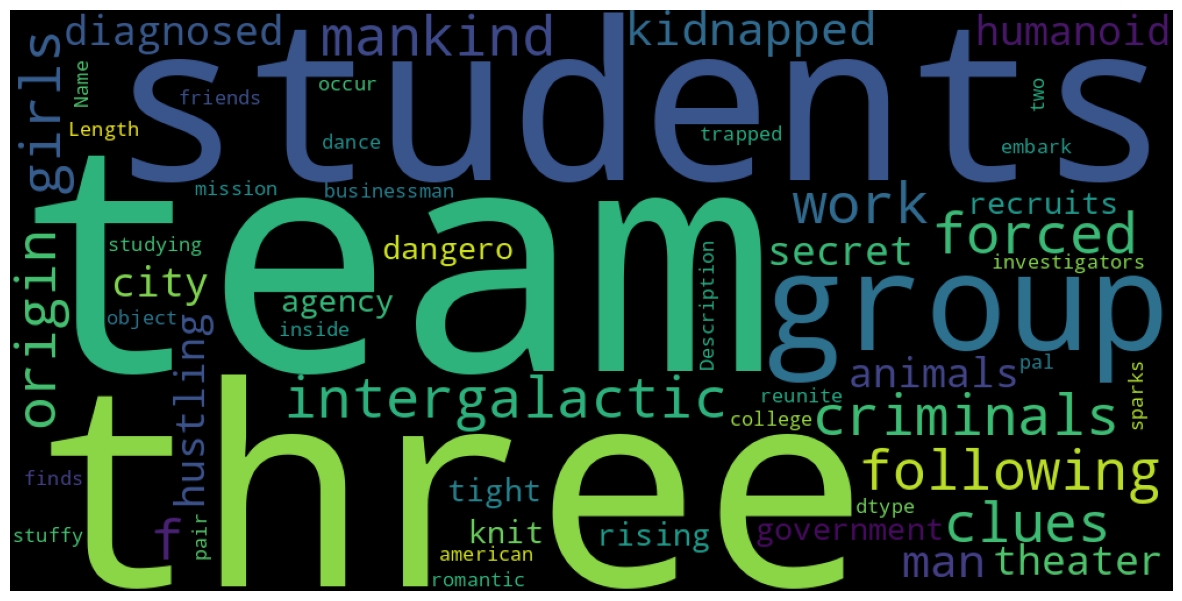

In [23]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [24]:
from nltk.probability import FreqDist

In [25]:
from nltk import flatten

In [26]:
imdb_words = imdb_txt.to_list()

In [27]:
imdb_words = flatten(imdb_words)

In [28]:
imdb_words =  [w for w in imdb_words if len(w) > 2]

In [29]:
imdb_words = [w for w in imdb_words if not w in ['...','u.s.']]

In [30]:
imdb_freq = FreqDist(imdb_words)

In [31]:
imdb_freq.most_common(100)

[('young', 127),
 ('new', 106),
 ('life', 101),
 ('world', 95),
 ('two', 80),
 ('man', 79),
 ('must', 69),
 ('family', 66),
 ('woman', 63),
 ('one', 62),
 ('story', 56),
 ('find', 55),
 ('finds', 52),
 ('love', 52),
 ('friends', 51),
 ('mysterious', 49),
 ('group', 48),
 ('home', 46),
 ('school', 44),
 ('girl', 44),
 ('father', 39),
 ('war', 39),
 ('team', 38),
 ('lives', 38),
 ('help', 38),
 ('order', 37),
 ('back', 36),
 ('years', 35),
 ('city', 33),
 ('becomes', 33),
 ('together', 32),
 ('agent', 32),
 ('wife', 31),
 ('three', 30),
 ('save', 30),
 ('become', 30),
 ('former', 30),
 ('take', 30),
 ('discover', 30),
 ('american', 29),
 ('time', 29),
 ('takes', 28),
 ('boy', 28),
 ('high', 28),
 ('mother', 28),
 ('son', 28),
 ('friend', 28),
 ('fight', 27),
 ('get', 27),
 ('forced', 26),
 ('mission', 26),
 ('best', 25),
 ('daughter', 25),
 ('journey', 25),
 ('forces', 25),
 ('way', 25),
 ('death', 24),
 ('set', 24),
 ('see', 24),
 ('stop', 23),
 ('past', 23),
 ('full', 23),
 ('town', 23

In [35]:
imdb_txt = imdb_reviews.Description

imdb_txt

0      A group of intergalactic criminals are forced ...
1      Following clues to the origin of mankind, a te...
2      Three girls are kidnapped by a man with a diag...
3      In a city of humanoid animals, a hustling thea...
4      A secret government agency recruits some of th...
                             ...                        
995    A tight-knit team of rising investigators, alo...
996    Three American college students studying abroa...
997    Romantic sparks occur between two dance studen...
998    A pair of friends embark on a mission to reuni...
999    A stuffy businessman finds himself trapped ins...
Name: Description, Length: 1000, dtype: object

In [41]:
imdb_txt = pd.DataFrame(imdb_txt, columns = ['Description'])

imdb_txt.head()

,Description
0,A group of intergalactic criminals are forced ...
1,"Following clues to the origin of mankind, a te..."
2,Three girls are kidnapped by a man with a diag...
3,"In a city of humanoid animals, a hustling thea..."
4,A secret government agency recruits some of th...


In [40]:
imdb_txt

0      A group of intergalactic criminals are forced ...
1      Following clues to the origin of mankind, a te...
2      Three girls are kidnapped by a man with a diag...
3      In a city of humanoid animals, a hustling thea...
4      A secret government agency recruits some of th...
                             ...                        
995    A tight-knit team of rising investigators, alo...
996    Three American college students studying abroa...
997    Romantic sparks occur between two dance studen...
998    A pair of friends embark on a mission to reuni...
999    A stuffy businessman finds himself trapped ins...
Name: Description, Length: 1000, dtype: object

In [42]:
imdb_txt.Description = imdb_txt.Description.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_english)]))

In [43]:
imdb_txt.Description = imdb_txt.Description.apply(lambda x: ' '.join([word for word in x.split() if len(word)>2]))

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
DTM = CountVectorizer(max_features=100, ngram_range=(3,3))

In [54]:
X_DTM = DTM.fit_transform(imdb_txt.Description)
X_DTM

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 184 stored elements and shape (1000, 100)>

In [55]:
X_DTM = pd.DataFrame(X_DTM.toarray(), columns = DTM.vocabulary_)
X_DTM

,save world apocalypse,out of work,new york city,17 year old,must unite defeat,youth discover blackbeard,see full summary,2013 boston marathon,2010 disaster offshore,behind enemy lines,...,2009 hijacking somali,zack miri look,1408 dolphin hotel,21 fact based,2018 mysterious new,the story revolves,story revolves around,zeus captured son,2028 detroit alex,yves cousteau aquatic
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
numcols = imdb_reviews[['Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)','Metascore']]

In [57]:
numcols

,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,121,8.1,757074,333.130,76.0
1,124,7.0,485820,126.460,65.0
2,117,7.3,157606,138.120,62.0
3,108,7.2,60545,270.320,59.0
4,123,6.2,393727,325.020,40.0
...,...,...,...,...,...
995,111,6.2,27585,47.985,45.0
996,94,5.5,73152,17.540,46.0
997,98,6.2,70699,58.010,50.0
998,93,5.6,4881,47.985,22.0


<Axes: >

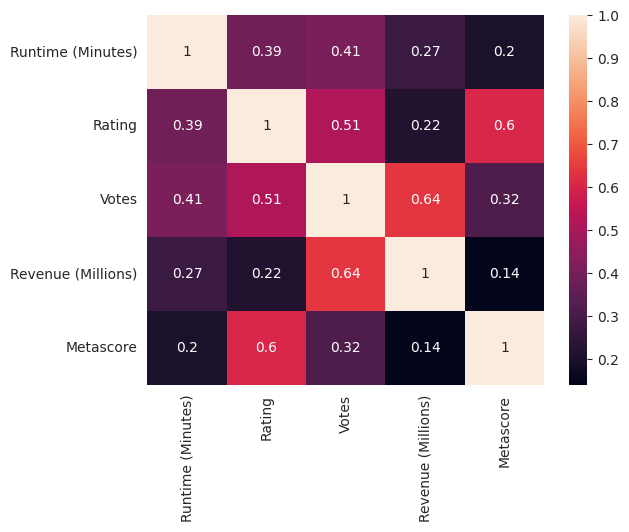

In [58]:
sns.heatmap(numcols.corr(),annot=True)

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [61]:
numcols

,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,121,8.1,757074,333.130,76.0
1,124,7.0,485820,126.460,65.0
2,117,7.3,157606,138.120,62.0
3,108,7.2,60545,270.320,59.0
4,123,6.2,393727,325.020,40.0
...,...,...,...,...,...
995,111,6.2,27585,47.985,45.0
996,94,5.5,73152,17.540,46.0
997,98,6.2,70699,58.010,50.0
998,93,5.6,4881,47.985,22.0


In [62]:
numcols_scaled = scaler.fit_transform(numcols)

In [63]:
numcols_scaled

array([[ 0.41634975,  1.45699912,  3.11268996,  2.62337699,  1.0213498 ],
       [ 0.57591149,  0.29292371,  1.67495992,  0.49428448,  0.35977591],
       [ 0.20360077,  0.61039882, -0.06467572,  0.61440457,  0.17934667],
       ...,
       [-0.80695688, -0.5536766 , -0.52530968, -0.21088019, -0.54237031],
       [-1.0728931 , -1.18862683, -0.87416543, -0.31415668, -2.22637658],
       [-1.39201657, -1.50610194, -0.83412689, -0.60616388, -2.88795047]],
      shape=(1000, 5))

In [64]:
numcols_scaled = pd.DataFrame(numcols_scaled,columns = numcols.columns)

In [65]:
numcols_scaled.head()

,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,0.416350,1.456999,3.112690,2.623377,1.021350
1,0.575911,0.292924,1.674960,0.494284,0.359776
2,0.203601,0.610399,-0.064676,0.614405,0.179347
3,-0.275084,0.504574,-0.579129,1.976315,-0.001083
4,0.522724,-0.553677,1.186839,2.539829,-1.143801


In [66]:
X = pd.concat([X_DTM, numcols_scaled],axis = 1)

In [67]:
from sklearn.cluster import KMeans

In [68]:
wcss_list=[]
for i in range(1,25):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)

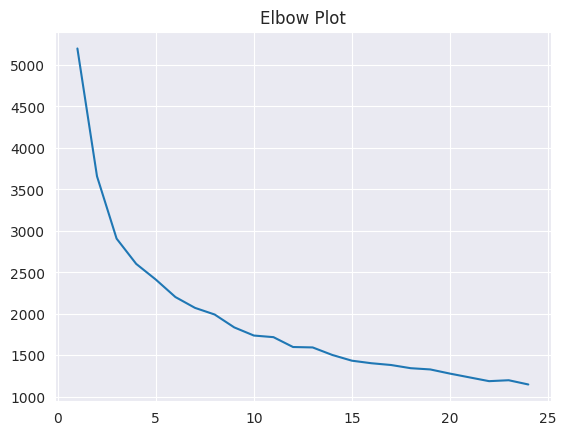

In [69]:
plt.plot(range(1,25),wcss_list)
plt.title('Elbow Plot')
plt.show()

In [70]:
clust2 = KMeans(n_clusters = 2)

In [71]:
clust2model = clust2.fit(X)

In [72]:
from sklearn.metrics import silhouette_score

In [73]:
silhouette_score(X,clust2model.labels_)

np.float64(0.303219614054653)

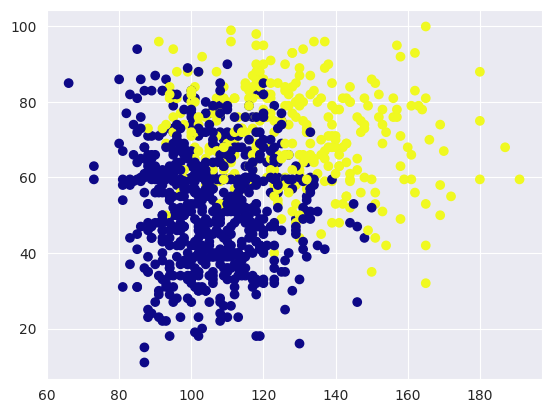

In [74]:
plt.scatter(x = numcols['Runtime (Minutes)'],y = numcols['Metascore'], c = clust2model.labels_, cmap = 'plasma')

In [75]:
from sklearn.cluster import AgglomerativeClustering

In [76]:
import scipy.cluster.hierarchy  as sch

In [77]:
from sklearn.metrics.pairwise import euclidean_distances

In [78]:
x_euclid = euclidean_distances(X)

/tmp/ipykernel_207139/3762324710.py:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendogram = sch.dendrogram(sch.linkage(x_euclid, method = 'ward'), orientation = 'left', labels = imdb_reviews.Title.tolist(), p = 200)


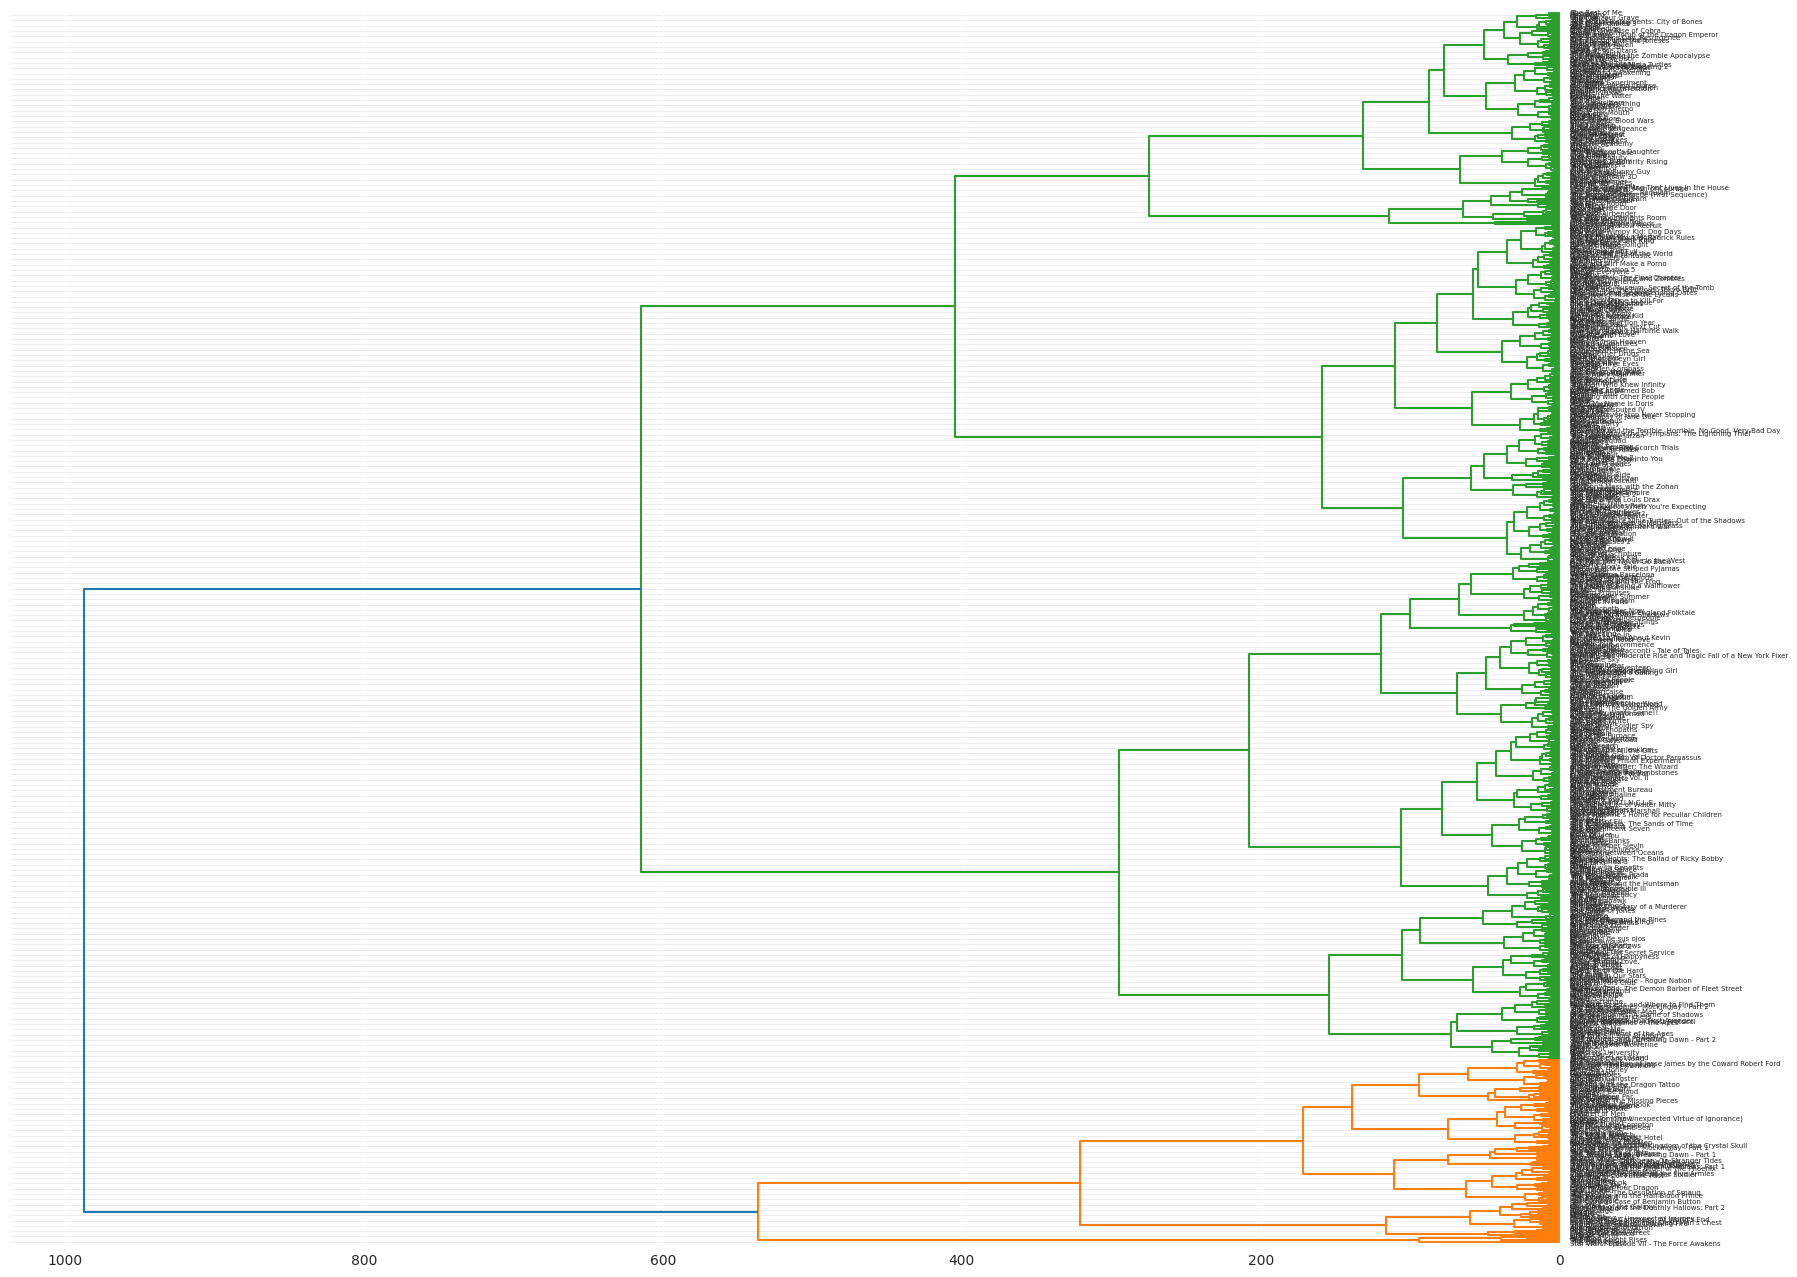

In [79]:
plt.figure(figsize=(20,16))
dendogram = sch.dendrogram(sch.linkage(x_euclid, method = 'ward'), orientation = 'left', labels = imdb_reviews.Title.tolist(), p = 200)